In [1]:
#Import Libraries
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sgt import SGT
from collections import defaultdict

import os 
pd.set_option('display.max_rows', 20)



# Training Experience: 10-11 months: Subjects 1,3,5,6

## Top Con - No Bias Boxes

### Healthy

In [53]:
#Read Corpus
path13 = '../../TOP_CON/Healthy/Healthy(1,3)/'
path5 = '../../TOP_CON/Healthy/Healthy(5)/'
path6 = '../../TOP_CON/Healthy/Healthy(6)/'
paths = [path13,path5, path6]

dict_images_healthy = defaultdict(list)
def load_files(path):
    for i in path:
        path_i = os.listdir(i)
        for filename in path_i:
            if filename!='.ipynb_checkpoints': 
                new_path = i + filename 
                #print(new_path[-33:-29])
                df = pd.read_csv(new_path)
                df['fixation_id_new'] = df['fixation_id'] - df.iloc[0,2] + 1
                dict_images_healthy[str(new_path[-33:-29])].append(df)
                
                
                #yield pd.read_csv(new_path)
load_files(paths)

for i in dict_images_healthy.keys(): 
    dict_images_healthy[i] = pd.concat(dict_images_healthy[i])
dict_images_healthy['9223']



,world_timestamp,world_index,fixation_id,start_timestamp,duration,dispersion,norm_pos_x,norm_pos_y,x_scaled,y_scaled,on_surf,fixation_id_new
0,348708.250750,5262,324,348708.236075,80.6900,1.469479,0.297020,0.348465,0.297020,0.348465,True,1
1,348708.284261,5263,324,348708.236075,80.6900,1.469479,0.295145,0.348908,0.295145,0.348908,True,1
2,348708.518834,5268,325,348708.510423,96.8280,1.231624,0.404349,0.354698,0.404349,0.354698,True,2
3,348708.552344,5269,325,348708.510423,96.8280,1.231624,0.399859,0.354932,0.399859,0.354932,True,2
4,348708.619365,5270,325,348708.510423,96.8280,1.231624,0.390286,0.351950,0.390286,0.351950,True,2
...,...,...,...,...,...,...,...,...,...,...,...,...
80,327838.325989,6149,1914,327838.228040,177.6370,1.166081,0.214112,0.735739,0.214112,0.735739,True,33
81,327838.415879,6150,1914,327838.228040,177.6370,1.166081,0.215588,0.734505,0.215588,0.734505,True,33
82,327838.496197,6151,1915,327838.480316,166.9505,1.434187,0.880323,0.478491,0.880323,0.478491,True,34
83,327838.578148,6152,1915,327838.480316,166.9505,1.434187,0.883698,0.471010,0.883698,0.471010,True,34


In [2]:
def equal_boxes(x,y):
    arr = []
    for i,j in zip(x,y):
        if 0<i and 0.25 > i and 0<j and 0.25 > j: 
            arr.append('A')
        elif 0.25<i and 0.5 > i and 0<j and 0.25 > j: 
            arr.append('B')
        elif 0.5<i and 0.75 > i and 0<j and 0.25 > j: 
            arr.append('C')
        elif 0.75<i and 1 > i and 0<j and 0.25 > j: 
            arr.append('D')
        elif 0<i and 0.25 > i and 0.25<j and 0.5 > j: 
            arr.append('E')
        elif 0.25<i and 0.5 > i and 0.25<j and 0.5 > j: 
            arr.append('F')
        elif 0.5<i and 0.75 > i and 0.25<j and 0.5 > j: 
            arr.append('G')
        elif 0.75<i and 1 > i and 0.25<j and 0.5 > j: 
            arr.append('H')
        elif 0<i and 0.25 > i and 0.5<j and 0.75 > j: 
            arr.append('I')
        elif 0.25<i and 0.5 > i and 0.5<j and 0.75 > j: 
            arr.append('J')
        elif 0.5<i and 0.75 > i and 0.5<j and 0.75 > j: 
            arr.append('K')
        elif 0.75<i and 1 > i and 0.5<j and 0.75 > j: 
            arr.append('L')
        elif 0<i and 0.25 > i and 0.75<j and 1 > j: 
            arr.append('M')
        elif 0.25<i and 0.5 > i and 0.75<j and 1 > j: 
            arr.append('N')
        elif 0.5<i and 0.75 > i and 0.75<j and 1 > j: 
            arr.append('O')
        elif 0.75<i and 1 > i and 0.75<j and 1 > j: 
            arr.append('P')
        else: 
            arr.append('error')
    return arr

# dict_images_arr = defaultdict()
# for i in dict_images_healthy.keys(): 
#     x = dict_images_healthy[i].norm_pos_x
#     y = dict_images_healthy[i].norm_pos_y
#     dict_images_arr[i] = equal_boxes(x,y)

In [3]:
def make_corpus(corpus_new):
    A = np.array(corpus_new.fixation_id_new[corpus_new.letters=='A'])
    B = np.array(corpus_new.fixation_id_new[corpus_new.letters=='B'])
    C = np.array(corpus_new.fixation_id_new[corpus_new.letters=='C'])
    D = np.array(corpus_new.fixation_id_new[corpus_new.letters=='D'])
    E = np.array(corpus_new.fixation_id_new[corpus_new.letters=='E'])
    F = np.array(corpus_new.fixation_id_new[corpus_new.letters=='F'])
    G = np.array(corpus_new.fixation_id_new[corpus_new.letters=='G'])
    H = np.array(corpus_new.fixation_id_new[corpus_new.letters=='H'])
    I = np.array(corpus_new.fixation_id_new[corpus_new.letters=='I'])
    J = np.array(corpus_new.fixation_id_new[corpus_new.letters=='J'])
    K = np.array(corpus_new.fixation_id_new[corpus_new.letters=='K'])
    L = np.array(corpus_new.fixation_id_new[corpus_new.letters=='L'])
    M = np.array(corpus_new.fixation_id_new[corpus_new.letters=='M'])
    N = np.array(corpus_new.fixation_id_new[corpus_new.letters=='N'])
    O = np.array(corpus_new.fixation_id_new[corpus_new.letters=='O'])
    P = np.array(corpus_new.fixation_id_new[corpus_new.letters=='P'])
    corpus = pd.DataFrame([[1, A], 
                           [2, B],
                           [3, C], 
                           [4, D], 
                           [5, E], 
                           [6, F],
                           [7, G], 
                           [8, H], 
                           [9, I], 
                           [10, J],
                           [11, K], 
                           [12, L], 
                           [13, M], 
                           [14, N],
                           [15, O], 
                           [16, P]], 
                          columns=['id', 'sequence'])
    return corpus

# for i in dict_images_arr.keys(): 
#     dict_images_healthy[i]['letters'] = dict_images_arr[i]
#     dict_images_healthy[i] = dict_images_healthy[i][['letters', 'fixation_id_new']]
#     dict_images_healthy[i]= make_corpus(dict_images_healthy[i])
    
# dict_images_healthy['9223']

In [57]:
embeddings_dict = defaultdict()
for i in dict_images_healthy.keys(): 
    sgt_ = SGT(kappa=1, 
               lengthsensitive=False, 
               mode='multiprocessing')
    sgtembedding_df = sgt_.fit_transform(dict_images_healthy[i])
    embeddings_dict[i] = sgtembedding_df.set_index('id')
display(embeddings_dict['9223'].columns)

INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.

Index([  (1, 1),   (1, 2),   (1, 3),   (1, 4),   (1, 5),   (1, 6),   (1, 7),
         (1, 8),   (1, 9),  (1, 10),
       ...
       (34, 25), (34, 26), (34, 27), (34, 28), (34, 29), (34, 30), (34, 31),
       (34, 32), (34, 33), (34, 34)],
      dtype='object', length=1156)

In [60]:
pca_dict = defaultdict()
for i in embeddings_dict.keys(): 
    pca = PCA(n_components=2)
    pca.fit(embeddings_dict[i])
    X=pca.transform(embeddings_dict[i])
    pca_dict[i] = pd.DataFrame(data=X, columns=['x1', 'x2'])


/home/sanmati/miniconda3/envs/sana-env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/sanmati/miniconda3/envs/sana-env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/sanmati/miniconda3/envs/sana-env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/sanmati/miniconda3/envs/sana-env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicit

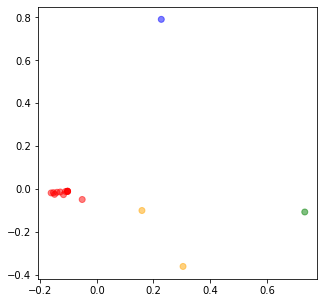

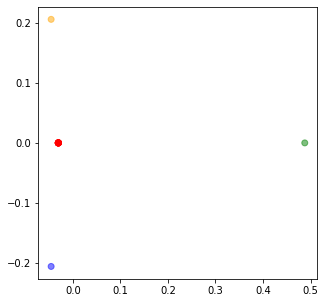

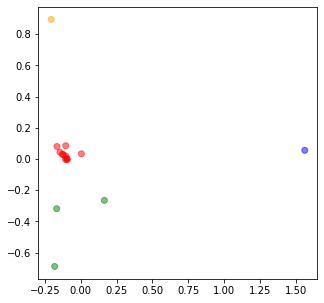

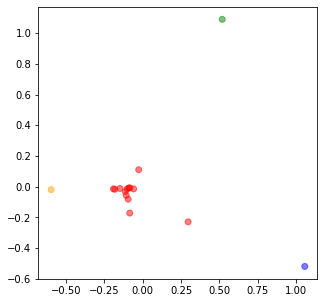

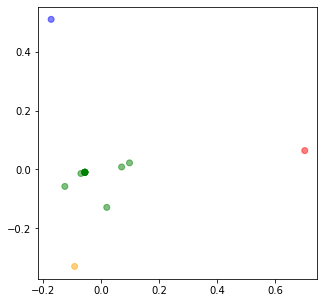

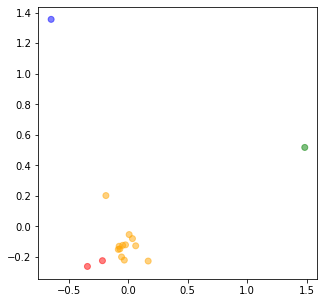

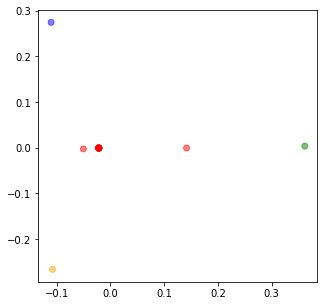

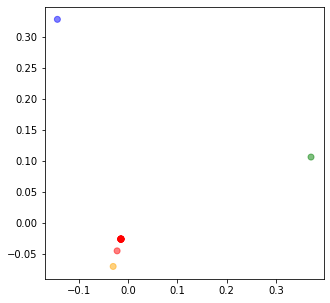

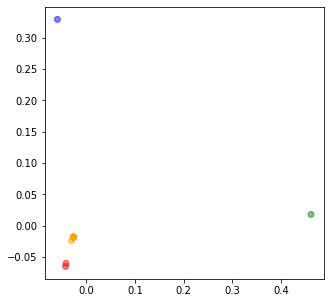

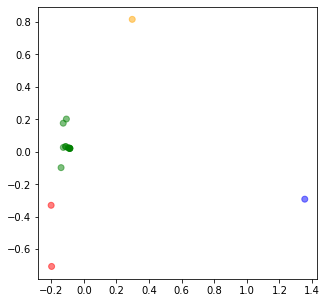

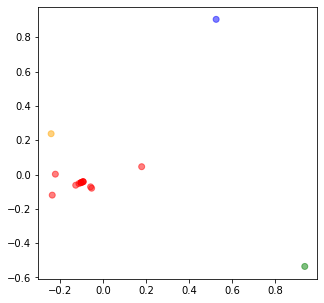

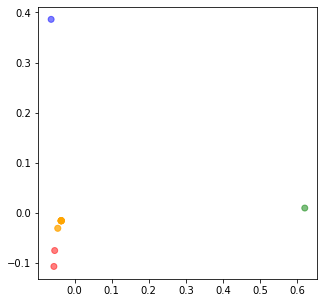

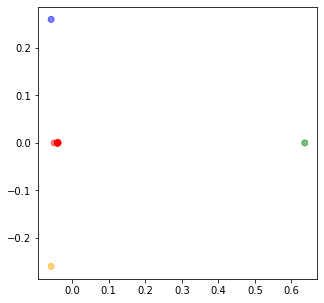

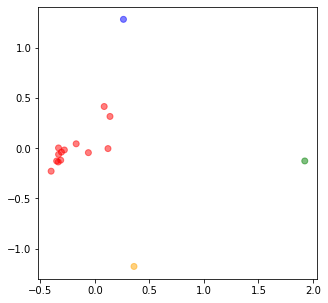

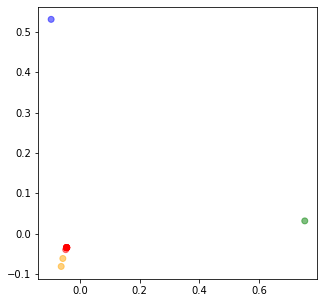

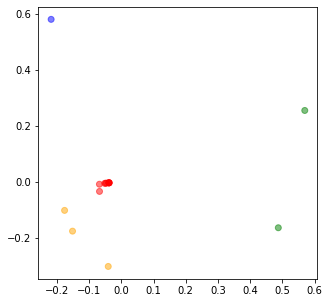

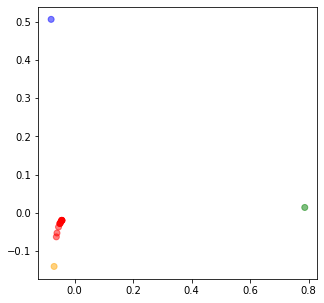

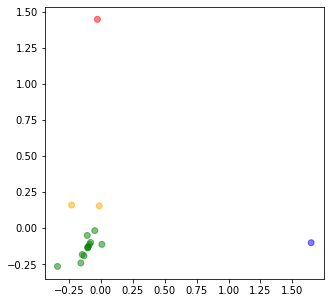

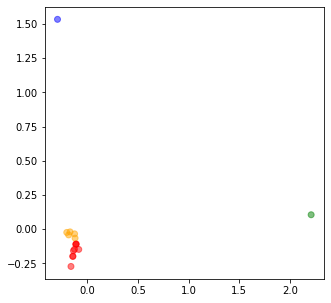

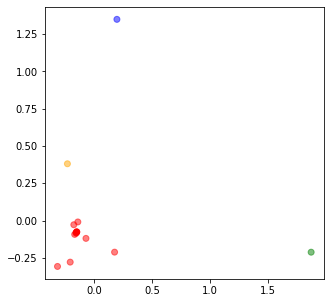

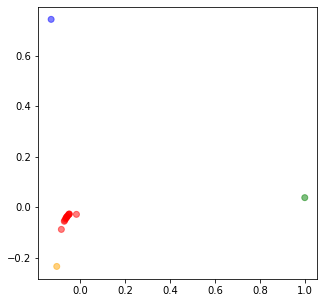

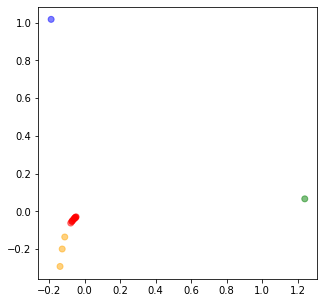

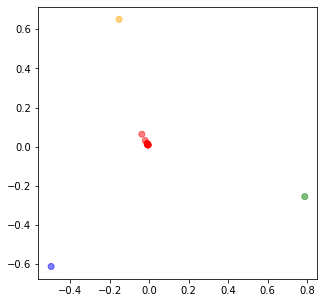

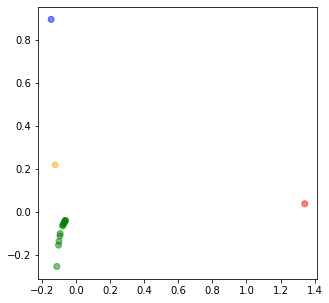

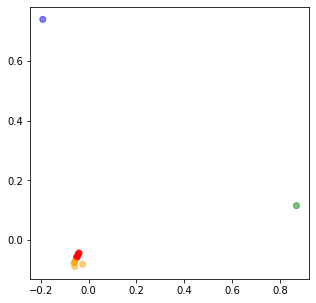

In [62]:
for i in pca_dict.keys():
    
    kmeans = KMeans(n_clusters=4, max_iter =300)
    kmeans.fit(pca_dict[i])

    labels = kmeans.predict(pca_dict[i])
    centroids = kmeans.cluster_centers_

    fig = plt.figure(figsize=(5, 5))
    colmap = {1: 'red', 2: 'green', 3: 'blue', 4: 'orange'}
    colors = list(map(lambda x: colmap[x+1], labels))
    plt.scatter(pca_dict[i]['x1'], pca_dict[i]['x2'], color=colors, alpha=0.5, edgecolor=colors)

In [8]:
df['labels'] = colors
df

,x1,x2,labels
0,-0.286897,-0.283612,orange
1,-0.922277,3.463619,green
2,-0.284229,-0.378112,orange
3,-0.223466,-0.597191,orange
4,-0.263949,-0.236209,orange
5,-0.179073,2.469870,green
6,-0.373230,-0.269628,orange
7,-0.463734,-1.472735,red
8,-0.247156,-0.311689,orange
9,-0.398051,-0.640694,orange


### Glaucoma

In [9]:
#Read Corpus
path13 = '../../TOP_CON/Glaucoma/Glaucoma(1,3)/'
path5 = '../../TOP_CON/Glaucoma/Glaucoma(5)/'
path6 = '../../TOP_CON/Glaucoma/Glaucoma(6)/'
paths = [path13,path5, path6]


def load_files(path):
    for i in path:
        path_i = os.listdir(i)
        for filename in path_i:
            if filename!='.ipynb_checkpoints': 
                new_path = i + filename 
                yield pd.read_csv(new_path)


corpus_diseased = pd.concat(load_files(paths))



In [10]:
x = corpus_diseased.norm_pos_x
y = corpus_diseased.norm_pos_y
arr = equal_boxes(x,y)

corpus = corpus_diseased
corpus['letters'] = arr
corpus_new = corpus[['letters', 'fixation_id']]
corpus= make_corpus(corpus_new)

In [11]:
sgt_ = SGT(kappa=1, 
           lengthsensitive=False, 
           mode='multiprocessing')
sgtembedding_df = sgt_.fit_transform(corpus)
sgtembedding_df = sgtembedding_df.set_index('id')

INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [12]:
pca = PCA(n_components=2)
pca.fit(sgtembedding_df)
X=pca.transform(sgtembedding_df)

df = pd.DataFrame(data=X, columns=['x1', 'x2'])

/home/sanmati/miniconda3/envs/sana-env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


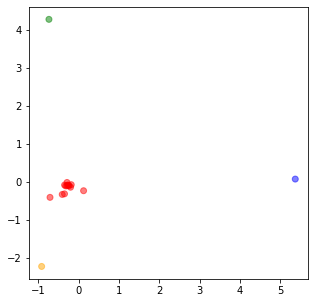

In [13]:
kmeans = KMeans(n_clusters=4, max_iter =300)
kmeans.fit(df)

labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

fig = plt.figure(figsize=(5, 5))
colmap = {1: 'red', 2: 'green', 3: 'blue', 4: 'orange'}
colors = list(map(lambda x: colmap[x+1], labels))
plt.scatter(df['x1'], df['x2'], color=colors, alpha=0.5, edgecolor=colors)

In [14]:
df['labels'] = colors
df

,x1,x2,labels
0,-0.319996,-0.109014,red
1,-0.735891,4.284507,green
2,-0.708963,-0.411465,red
3,-0.917002,-2.233945,orange
4,-0.287507,-0.019032,red
5,-0.348075,-0.085632,red
6,-0.405771,-0.334177,red
7,-0.349681,-0.318574,red
8,-0.287564,-0.104317,red
9,-0.199957,-0.144182,red


## Top Con -  Bias Boxes

### Healthy

In [2]:
#Read Corpus
path10 = '../../TOP_CON/Healthy/Healthy(10)/'
path11 = '../../TOP_CON/Healthy/Healthy(11)/'
path13= '../../TOP_CON/Healthy/Healthy(13)/'

paths = [path10, path11, path13]

dict_images_healthy = defaultdict(list)
def load_files(path):
    for i in path:
        path_i = os.listdir(i)
        for filename in path_i:
            if filename!='.ipynb_checkpoints': 
                new_path = i + filename 
                #print(new_path[-33:-29])
                df = pd.read_csv(new_path)
                df['fixation_id_new'] = df['fixation_id'] - df.iloc[0,2] + 1
                dict_images_healthy[str(new_path[-33:-29])].append(df)
                
                
                #yield pd.read_csv(new_path)
load_files(paths)

for i in dict_images_healthy.keys(): 
    dict_images_healthy[i] = pd.concat(dict_images_healthy[i])
# dict_images_healthy['9223']



In [3]:
def bias_boxes(x,y): 
    arr = []
    for i,j in zip(x,y):
        if 0<i and 0.6 > i and 0<j and 0.6 > j: 
            arr.append('A')
        elif 0<i and 0.25 > i and 0.6<j and 1 > j: 
            arr.append('B')
        elif 0.25<i and 0.48 > i and 0.6<j and 1 > j: 
            arr.append('C')
        elif 0.48<i and 0.6 > i and 0.6<j and 1 > j: 
            arr.append('D')
        elif 0.6<i and 1 > i and 0<j and 0.6 > j: 
            arr.append('E')
        elif 0.6<i and 0.77 > i and 0.6<j and 1 > j: 
            arr.append('F')
        elif 0.77<i and 1 > i and 0.6<j and 1 > j: 
            arr.append('G')
        else: 
            print('here')
            arr.append('error')
            
    return arr

dict_images_arr = defaultdict()
for i in dict_images_healthy.keys(): 
    x = dict_images_healthy[i].norm_pos_x
    y = dict_images_healthy[i].norm_pos_y
    dict_images_arr[i] = bias_boxes(x,y)



In [4]:
def make_corpus_2(corpus_new): 
    A = np.array(corpus_new.fixation_id_new[corpus_new.letters=='A'])
    B = np.array(corpus_new.fixation_id_new[corpus_new.letters=='B'])
    C = np.array(corpus_new.fixation_id_new[corpus_new.letters=='C'])
    D = np.array(corpus_new.fixation_id_new[corpus_new.letters=='D'])
    E = np.array(corpus_new.fixation_id_new[corpus_new.letters=='E'])
    F = np.array(corpus_new.fixation_id_new[corpus_new.letters=='F'])
    G = np.array(corpus_new.fixation_id_new[corpus_new.letters=='G'])
    corpus = pd.DataFrame([[1, A], 
                           [2, B],
                           [3, C], 
                           [4, D], 
                           [5, E], 
                           [6, F],
                           [7, G]], columns=['id', 'sequence'])
    return corpus

for i in dict_images_arr.keys(): 
    dict_images_healthy[i]['letters'] = dict_images_arr[i]
    dict_images_healthy[i] = dict_images_healthy[i][['letters', 'fixation_id_new']]
    dict_images_healthy[i]= make_corpus_2(dict_images_healthy[i])
    
dict_images_healthy['8960']
    

,id,sequence
0,1,"[1, 1, 2, 2, 25, 25, 26, 26, 27, 27, 28, 28, 2..."
1,2,"[39, 41, 41, 43, 43, 43]"
2,3,"[31, 31, 39, 39, 40, 40, 40, 42, 42, 42]"
3,4,[]
4,5,"[8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 1..."
5,6,"[3, 4, 4, 4, 5, 5, 5, 6, 7, 15, 15, 16, 16, 16..."
6,7,"[6, 6, 7, 20, 20, 20]"


In [5]:
# l = corpus.reset_index()
# l.columns = ['regions', 'id', 'fixation ids']
# l[['regions', 'fixation ids']]


In [6]:
embeddings_dict = defaultdict()
for i in dict_images_healthy.keys(): 
    sgt_ = SGT(kappa=1, 
               lengthsensitive=False, 
               mode='multiprocessing')
    sgtembedding_df = sgt_.fit_transform(dict_images_healthy[i])
    embeddings_dict[i] = sgtembedding_df.set_index('id')
display(embeddings_dict['8960'])

INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.

,"(1, 1)","(1, 2)","(1, 3)","(1, 4)","(1, 5)","(1, 6)","(1, 7)","(1, 8)","(1, 9)","(1, 10)",...,"(45, 36)","(45, 37)","(45, 38)","(45, 39)","(45, 40)","(45, 41)","(45, 42)","(45, 43)","(45, 44)","(45, 45)"
id,,,,,,,,,,,,,,,,,,,,,
1.0,0.122626,0.150888,0.022604,0.001125,0.000076,0.000010,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.290365
2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
5.0,0.290365,0.092364,0.006277,0.000622,0.000062,0.000023,0.0,0.000006,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
6.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
7.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [7]:
pca_dict = defaultdict()
for i in embeddings_dict.keys():
    print(i)
    display(embeddings_dict[i])
    pca = PCA(n_components=2)
    pca.fit(embeddings_dict[i])
    X=pca.transform(embeddings_dict[i])
    pca_dict[i] = pd.DataFrame(data=X, columns=['x1', 'x2'])


8909


,"(1, 1)","(1, 2)","(1, 3)","(1, 4)","(1, 5)","(1, 6)","(1, 7)","(1, 8)","(1, 9)","(1, 10)",...,"(56, 47)","(56, 48)","(56, 49)","(56, 50)","(56, 51)","(56, 52)","(56, 53)","(56, 54)","(56, 55)","(56, 56)"
id,,,,,,,,,,,,,,,,,,,,,
1.0,0.367879,0.000000,0.000000,0.000000,0.000000,0.251607,0.092561,0.000000,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
5.0,0.290365,0.092364,0.000000,0.004599,0.000313,0.000062,0.000011,0.000001,2.849672e-07,2.825451e-08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.367879
6.0,0.367879,0.172084,0.034051,0.008568,0.001159,0.000229,0.000084,0.000016,1.057322e-06,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
7.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


8904


,"(1, 1)","(1, 2)","(1, 3)","(1, 4)","(1, 5)","(1, 6)","(1, 7)","(1, 8)","(1, 9)","(1, 10)",...,"(100, 87)","(100, 89)","(100, 90)","(100, 94)","(100, 95)","(100, 96)","(100, 97)","(100, 98)","(100, 99)","(100, 100)"
id,,,,,,,,,,,,,,,,,,,,,
1.0,0.000000,0.367879,0.092561,0.000000,0.012527,0.002479,0.000912,0.000335,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3.0,0.367879,0.172084,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
5.0,0.000000,0.367879,0.135335,0.024947,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.290365
6.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
7.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


9191


,"(1, 1)","(1, 2)","(1, 3)","(1, 4)","(1, 5)","(1, 6)","(1, 7)","(1, 8)","(1, 9)","(1, 10)",...,"(25, 15)","(25, 16)","(25, 17)","(25, 18)","(25, 19)","(25, 20)","(25, 21)","(25, 22)","(25, 23)","(25, 25)"
id,,,,,,,,,,,,,,,,,,,,,
1.0,0.000000,0.367879,0.000000,0.000000,0.000000,0.067813,0.003376,0.0,0.0,0.0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00
2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00
3.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00
4.0,0.000000,0.251607,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00
5.0,0.290365,0.071568,0.001311,0.000031,0.000001,0.000000,0.000000,0.0,0.0,0.0,...,0.0,9.417785e-13,6.400050e-14,1.266417e-14,0.0,0.0,0.0,0.0,0.0,4.658886e-15
6.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00
7.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00


8960


,"(1, 1)","(1, 2)","(1, 3)","(1, 4)","(1, 5)","(1, 6)","(1, 7)","(1, 8)","(1, 9)","(1, 10)",...,"(45, 36)","(45, 37)","(45, 38)","(45, 39)","(45, 40)","(45, 41)","(45, 42)","(45, 43)","(45, 44)","(45, 45)"
id,,,,,,,,,,,,,,,,,,,,,
1.0,0.122626,0.150888,0.022604,0.001125,0.000076,0.000010,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.290365
2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
5.0,0.290365,0.092364,0.006277,0.000622,0.000062,0.000023,0.0,0.000006,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
6.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
7.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


9193


,"(1, 1)","(1, 2)","(1, 3)","(1, 4)","(1, 5)","(1, 6)","(1, 7)","(1, 8)","(1, 9)","(1, 10)",...,"(81, 31)","(81, 32)","(81, 33)","(81, 34)","(81, 35)","(81, 48)","(81, 50)","(81, 51)","(81, 79)","(81, 81)"
id,,,,,,,,,,,,,,,,,,,,,
1.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.0,0.367879,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.251607,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.0,0.000000,0.0,0.251607,0.034051,0.006738,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6.0,0.000000,0.0,0.367879,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


9219


,"(1, 1)","(1, 2)","(1, 3)","(1, 4)","(1, 5)","(1, 6)","(1, 7)","(1, 8)","(1, 9)","(1, 10)",...,"(99, 89)","(99, 90)","(99, 91)","(99, 92)","(99, 93)","(99, 95)","(99, 96)","(99, 97)","(99, 98)","(99, 99)"
id,,,,,,,,,,,,,,,,,,,,,
1.0,0.000000,6.470235e-26,2.380266e-26,4.387639e-27,2.981710e-28,2.956368e-29,0.0,2.009061e-30,3.975450e-31,1.000252e-31,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.0,0.000006,2.177741e-01,3.405135e-02,6.737947e-03,2.478752e-03,0.000000e+00,0.0,0.000000e+00,9.118820e-04,3.354626e-04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


9084


,"(1, 1)","(1, 2)","(1, 3)","(1, 4)","(1, 5)","(1, 6)","(1, 7)","(1, 8)","(1, 9)","(1, 10)",...,"(46, 20)","(46, 21)","(46, 35)","(46, 36)","(46, 37)","(46, 38)","(46, 39)","(46, 40)","(46, 45)","(46, 46)"
id,,,,,,,,,,,,,,,,,,,,,
1.0,0.000000,0.367879,0.000000,0.000000,4.139938e-08,1.522998e-08,0.00000,2.807402e-09,2.789468e-10,6.170745e-02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
5.0,0.000000,0.251607,0.000000,0.034051,0.000000e+00,4.608350e-03,0.00024,1.132587e-06,5.638818e-08,2.175288e-09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.367879
6.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
7.0,0.367879,0.000000,0.172084,0.023289,4.608350e-03,1.695317e-03,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


9061


,"(1, 1)","(1, 2)","(1, 3)","(1, 4)","(1, 5)","(1, 6)","(1, 7)","(1, 8)","(1, 9)","(1, 10)",...,"(39, 30)","(39, 31)","(39, 32)","(39, 33)","(39, 34)","(39, 35)","(39, 36)","(39, 37)","(39, 38)","(39, 39)"
id,,,,,,,,,,,,,,,,,,,,,
1.0,0.000000,0.367879,0.092561,1.879529e-12,0.000000,0.000000,0.000000,6.914400e-13,2.543666e-13,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.367879
2.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
5.0,0.000045,0.000000,0.245259,4.839750e-02,0.006558,0.000016,0.000001,9.625880e-04,8.262526e-04,0.000624,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
6.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
7.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


9059


,"(1, 1)","(1, 2)","(1, 3)","(1, 4)","(1, 5)","(1, 6)","(1, 7)","(1, 8)","(1, 9)","(1, 10)",...,"(41, 31)","(41, 32)","(41, 33)","(41, 34)","(41, 35)","(41, 36)","(41, 37)","(41, 38)","(41, 39)","(41, 41)"
id,,,,,,,,,,,,,,,,,,,,,
1.0,0.367879,0.172084,2.354447e-14,8.661526e-15,3.186397e-15,0.000000,1.172210e-15,4.312320e-16,1.586414e-16,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.0,0.000000,0.000000,1.843339e-01,4.817182e-03,2.274861e-05,0.000002,2.613191e-07,0.000000e+00,0.000000e+00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7.0,0.000000,0.173843,1.966792e-02,0.000000e+00,9.118820e-04,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


9187


,"(1, 1)","(1, 2)","(1, 3)","(1, 4)","(1, 5)","(1, 6)","(1, 7)","(1, 8)","(1, 9)","(1, 10)",...,"(67, 52)","(67, 53)","(67, 54)","(67, 55)","(67, 56)","(67, 57)","(67, 58)","(67, 64)","(67, 65)","(67, 67)"
id,,,,,,,,,,,,,,,,,,,,,
1.0,1.026188e-10,0.251607,0.049787,0.183940,0.067668,0.0,0.024894,0.000000,0.004589,0.000312,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
5.0,0.000000e+00,0.184334,0.018316,0.006738,0.000000,0.0,0.001695,0.000229,0.000023,0.000001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.290365
6.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
7.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


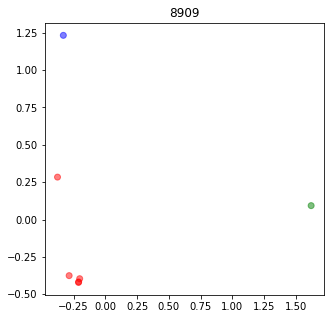

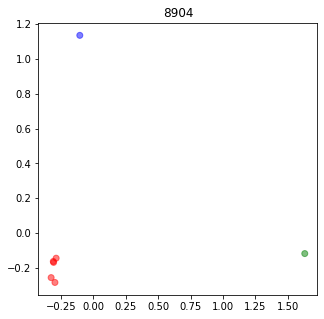

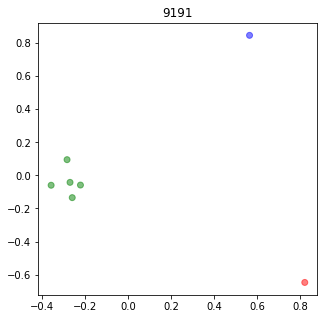

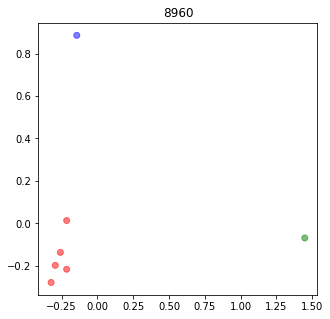

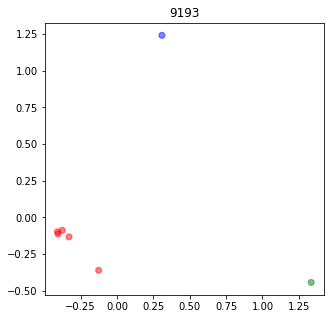

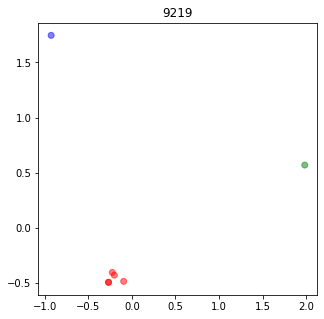

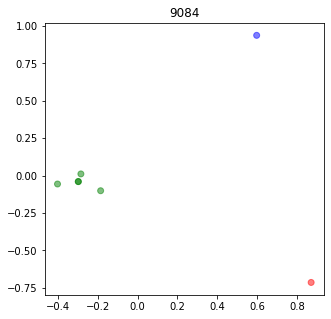

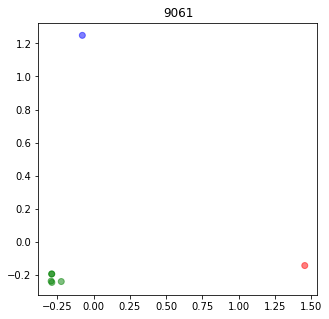

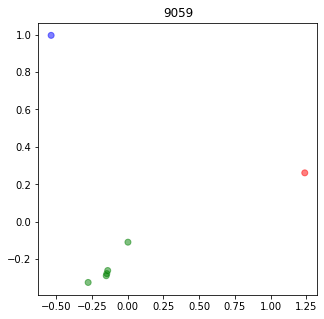

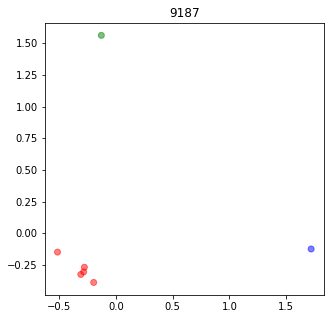

In [8]:
for i in pca_dict.keys():
    
    kmeans = KMeans(n_clusters=3, n_init=5)
    kmeans.fit(pca_dict[i])

    labels = kmeans.predict(pca_dict[i])
    centroids = kmeans.cluster_centers_

    fig = plt.figure(figsize=(5, 5))
#     colmap = {1: 'red', 2: 'green', 3: 'blue', 4: 'orange'}
    colmap = {1: 'red', 2: 'green', 3: 'blue'}

    colors = list(map(lambda x: colmap[x+1], labels))
    pca_dict[i]['labels'] = colors

    plt.scatter(pca_dict[i]['x1'], pca_dict[i]['x2'], color=colors, alpha=0.5, edgecolor=colors)
    plt.title(i)

In [9]:
for i in pca_dict.keys():
    print(i)
    display(pca_dict[i])

8909


,x1,x2,labels
0,1.620388,0.093110,green
1,-0.210856,-0.417581,red
2,-0.285786,-0.375339,red
3,-0.202785,-0.395699,red
4,-0.331468,1.232517,blue
5,-0.377421,0.283927,red
6,-0.212072,-0.420935,red


8904


,x1,x2,labels
0,-0.326256,-0.256116,red
1,-0.309528,-0.163260,red
2,-0.296834,-0.283923,red
3,-0.307233,-0.168827,red
4,1.632300,-0.118123,green
5,-0.287571,-0.144652,red
6,-0.104877,1.134902,blue


9191


,x1,x2,labels
0,0.822227,-0.646988,red
1,-0.268942,-0.042129,green
2,-0.356808,-0.059553,green
3,-0.220526,-0.058384,green
4,0.565508,0.846380,blue
5,-0.258683,-0.134399,green
6,-0.282778,0.095074,green


8960


,x1,x2,labels
0,1.448865,-0.068974,green
1,-0.294149,-0.197987,red
2,-0.323056,-0.278461,red
3,-0.258483,-0.136952,red
4,-0.143783,0.885542,blue
5,-0.214502,0.013206,red
6,-0.214892,-0.216375,red


9193


,x1,x2,labels
0,0.309120,1.241767,blue
1,-0.375523,-0.088722,red
2,-0.405118,-0.113875,red
3,-0.408338,-0.098966,red
4,1.334338,-0.444558,green
5,-0.125581,-0.361709,red
6,-0.328898,-0.133937,red


9219


,x1,x2,labels
0,-0.926227,1.745814,blue
1,-0.268595,-0.496707,red
2,-0.267577,-0.494524,red
3,-0.225110,-0.405728,red
4,1.982968,0.568559,green
5,-0.094266,-0.486887,red
6,-0.201193,-0.430528,red


9084


,x1,x2,labels
0,0.872127,-0.713733,red
1,-0.402749,-0.055783,green
2,-0.185997,-0.100691,green
3,-0.298217,-0.039560,green
4,0.598266,0.937698,blue
5,-0.298217,-0.039560,green
6,-0.285213,0.011629,green


9061


,x1,x2,labels
0,-0.077333,1.248014,blue
1,-0.222611,-0.238865,green
2,-0.292543,-0.236136,green
3,-0.288554,-0.193115,green
4,1.457068,-0.142375,red
5,-0.288554,-0.193115,green
6,-0.287472,-0.244409,green


9059


,x1,x2,labels
0,1.238054,0.261523,red
1,-0.148823,-0.287893,green
2,-0.275120,-0.323835,green
3,-0.138524,-0.260143,green
4,-0.533700,0.995892,blue
5,-0.144765,-0.276762,green
6,0.002877,-0.108781,green


9187


,x1,x2,labels
0,-0.130072,1.562224,green
1,-0.279692,-0.268646,red
2,-0.197673,-0.388712,red
3,-0.286081,-0.305477,red
4,1.721985,-0.124683,blue
5,-0.311467,-0.325423,red
6,-0.517000,-0.149282,red


### Glaucoma

In [10]:
#Read Corpus
path10 = '../../TOP_CON/Glaucoma/Glaucoma(10)/'
path11 = '../../TOP_CON/Glaucoma/Glaucoma(11)/'
path13 = '../../TOP_CON/Glaucoma/Glaucoma(13)/'
paths = [path10, path11, path13]

dict_images_healthy = defaultdict(list)
def load_files(path):
    for i in path:
        path_i = os.listdir(i)
        for filename in path_i:
            if filename!='.ipynb_checkpoints': 
                new_path = i + filename 
                #print(new_path[-33:-29])
                df = pd.read_csv(new_path)
                df['fixation_id_new'] = df['fixation_id'] - df.iloc[0,2] + 1
                dict_images_healthy[str(new_path[-33:-29])].append(df)
                
                
                #yield pd.read_csv(new_path)
load_files(paths)

for i in dict_images_healthy.keys(): 
    dict_images_healthy[i] = pd.concat(dict_images_healthy[i])
# dict_images_healthy['9223']



In [11]:
dict_images_arr = defaultdict()
for i in dict_images_healthy.keys(): 
    x = dict_images_healthy[i].norm_pos_x
    y = dict_images_healthy[i].norm_pos_y
    dict_images_arr[i] = bias_boxes(x,y)
    
for i in dict_images_arr.keys(): 
    dict_images_healthy[i]['letters'] = dict_images_arr[i]
    dict_images_healthy[i] = dict_images_healthy[i][['letters', 'fixation_id_new']]
    dict_images_healthy[i]= make_corpus_2(dict_images_healthy[i])

In [12]:
embeddings_dict = defaultdict()
for i in dict_images_healthy.keys(): 
    sgt_ = SGT(kappa=1, 
               lengthsensitive=False, 
               mode='multiprocessing')
    sgtembedding_df = sgt_.fit_transform(dict_images_healthy[i])
    embeddings_dict[i] = sgtembedding_df.set_index('id')
#display(embeddings_dict['9223'].columns)

INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.

In [13]:
pca_dict = defaultdict()
for i in embeddings_dict.keys(): 
    pca = PCA(n_components=2)
    pca.fit(embeddings_dict[i])
    X=pca.transform(embeddings_dict[i])
    pca_dict[i] = pd.DataFrame(data=X, columns=['x1', 'x2'])


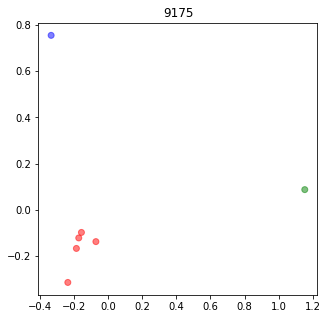

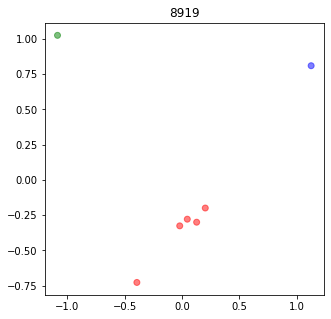

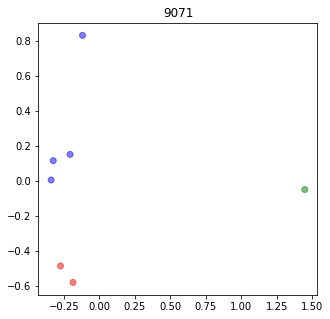

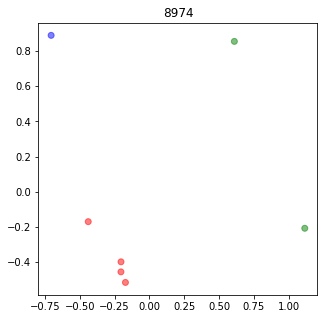

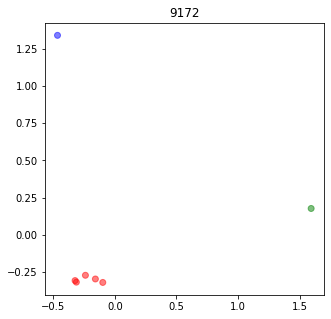

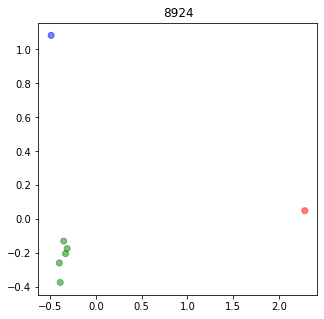

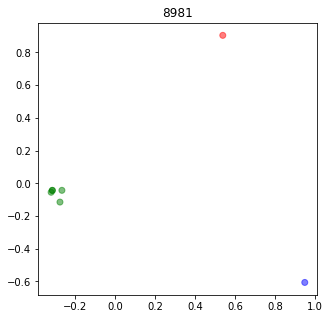

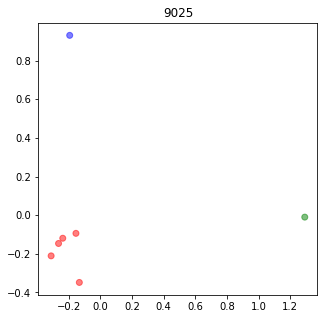

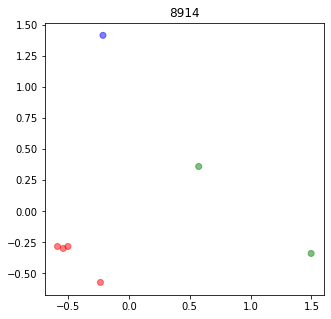

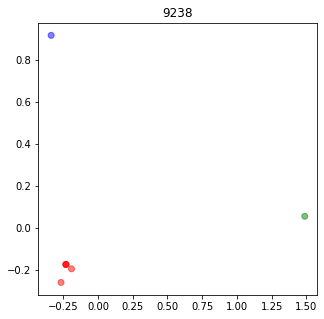

In [14]:
for i in pca_dict.keys():
    
    kmeans = KMeans(n_clusters=3, n_init=5)
    kmeans.fit(pca_dict[i])

    labels = kmeans.predict(pca_dict[i])
    centroids = kmeans.cluster_centers_

    fig = plt.figure(figsize=(5, 5))
#     colmap = {1: 'red', 2: 'green', 3: 'blue', 4: 'orange'}
    colmap = {1: 'red', 2: 'green', 3: 'blue'}

    colors = list(map(lambda x: colmap[x+1], labels))
    pca_dict[i]['labels'] = colors

    plt.scatter(pca_dict[i]['x1'], pca_dict[i]['x2'], color=colors, alpha=0.5, edgecolor=colors)
    plt.title(i)

In [15]:
for i in pca_dict.keys():
    print(i)
    display(pca_dict[i])

9175


,x1,x2,labels
0,-0.333407,0.754904,blue
1,-0.171579,-0.122306,red
2,-0.071076,-0.138222,red
3,-0.155838,-0.098490,red
4,1.152881,0.086917,green
5,-0.235630,-0.315029,red
6,-0.185351,-0.167774,red


8919


,x1,x2,labels
0,1.125927,0.809101,blue
1,0.202480,-0.199942,red
2,-0.020438,-0.326316,red
3,0.127136,-0.300529,red
4,-1.086537,1.024390,green
5,0.045600,-0.279097,red
6,-0.394168,-0.727607,red


9071


,x1,x2,labels
0,-0.118328,0.833446,blue
1,-0.205775,0.153062,blue
2,-0.324347,0.117305,blue
3,-0.339306,0.006829,blue
4,1.446348,-0.047763,green
5,-0.185313,-0.578630,red
6,-0.273280,-0.484249,red


8974


,x1,x2,labels
0,1.114520,-0.207225,green
1,-0.171945,-0.515146,red
2,-0.438907,-0.169576,red
3,-0.203773,-0.397891,red
4,0.609381,0.855263,green
5,-0.204203,-0.455010,red
6,-0.705073,0.889585,blue


9172


,x1,x2,labels
0,-0.464708,1.339801,blue
1,-0.157521,-0.297137,red
2,-0.097541,-0.320447,red
3,-0.238334,-0.272346,red
4,1.592235,0.176536,green
5,-0.311847,-0.318437,red
6,-0.322285,-0.307969,red


8924


,x1,x2,labels
0,-0.490809,1.083107,blue
1,-0.401249,-0.257379,green
2,-0.333491,-0.202482,green
3,-0.353126,-0.128855,green
4,2.285048,0.050459,red
5,-0.315279,-0.172653,green
6,-0.391092,-0.372197,green


8981


,x1,x2,labels
0,0.947360,-0.606129,blue
1,-0.265181,-0.042869,green
2,-0.319036,-0.054685,green
3,-0.313129,-0.043199,green
4,0.538041,0.904795,red
5,-0.313129,-0.043199,green
6,-0.274926,-0.114714,green


9025


,x1,x2,labels
0,-0.154016,-0.094389,red
1,-0.310730,-0.210955,red
2,-0.263869,-0.146847,red
3,-0.237262,-0.119780,red
4,1.291821,-0.010345,green
5,-0.132503,-0.348647,red
6,-0.193442,0.930963,blue


8914


,x1,x2,labels
0,1.497598,-0.339109,green
1,-0.233362,-0.572334,red
2,-0.539168,-0.298848,red
3,-0.500034,-0.282952,red
4,0.573777,0.360683,green
5,-0.586092,-0.282931,red
6,-0.212719,1.415490,blue


9238


,x1,x2,labels
0,-0.337529,0.916283,blue
1,-0.231165,-0.173237,red
2,-0.266289,-0.258662,red
3,-0.231165,-0.173237,red
4,1.488392,0.055912,green
5,-0.191080,-0.193820,red
6,-0.231165,-0.173237,red


## Zeiss - No Bias Boxes

### Healthy

In [26]:
path13 = '../../Zeiss/Healthy/Healthy(3)/'
path5 = '../../Zeiss/Healthy/Healthy(5)/'
path6 = '../../Zeiss/Healthy/Healthy(6)/'
paths = [path13,path5, path6]

def load_files(path):
    for i in path:
        path_i = os.listdir(i)
        for filename in path_i:
            if filename!='.ipynb_checkpoints': 
                new_path = i + filename 
                yield pd.read_csv(new_path)


corpus_healthy = pd.concat(load_files(paths))

In [27]:
x = corpus_healthy.norm_pos_x
y = corpus_healthy.norm_pos_y
arr = equal_boxes(x,y)

corpus = corpus_healthy
corpus['letters'] = arr
corpus_new = corpus[['letters', 'fixation_id']]
corpus= make_corpus(corpus_new)
        

In [28]:
sgt_ = SGT(kappa=1, 
           lengthsensitive=False, 
           mode='multiprocessing')
sgtembedding_df = sgt_.fit_transform(corpus)
sgtembedding_df = sgtembedding_df.set_index('id')
sgtembedding_df

INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


,"(40, 40)","(40, 41)","(40, 42)","(40, 43)","(40, 44)","(40, 45)","(40, 46)","(40, 47)","(40, 48)","(40, 49)",...,"(1651, 1642)","(1651, 1643)","(1651, 1644)","(1651, 1645)","(1651, 1646)","(1651, 1647)","(1651, 1648)","(1651, 1649)","(1651, 1650)","(1651, 1651)"
id,,,,,,,,,,,,,,,,,,,,,
1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
5.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
6.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
7.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
8.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
9.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [29]:
pca = PCA(n_components=2)
pca.fit(sgtembedding_df)
X=pca.transform(sgtembedding_df)

df = pd.DataFrame(data=X, columns=['x1', 'x2'])


/home/sanmati/miniconda3/envs/sana-env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


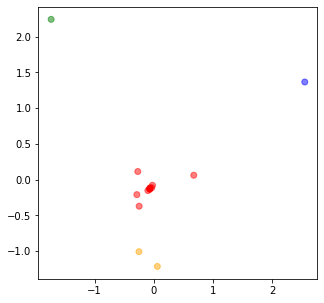

In [30]:
kmeans = KMeans(n_clusters=4, max_iter =300)
kmeans.fit(df)

labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

fig = plt.figure(figsize=(5, 5))
colmap = {1: 'r', 2: 'g', 3: 'b', 4: 'orange'}
colors = list(map(lambda x: colmap[x+1], labels))
plt.scatter(df['x1'], df['x2'], color=colors, alpha=0.5, edgecolor=colors)

In [31]:
df['labels'] = colors
df

,x1,x2,labels
0,-0.069503,-0.132272,r
1,-0.100115,-0.153945,r
2,-0.071077,-0.125342,r
3,-0.060739,-0.114259,r
4,-0.022772,-0.079392,r
5,-1.734839,2.242374,g
6,-0.270751,0.112940,r
7,-0.069352,-0.136716,r
8,2.549743,1.365643,b
9,-0.248193,-0.372145,r


### Glaucoma

In [32]:
path13 = '../../Zeiss/Glaucoma/Glaucoma(3)/'
path5 = '../../Zeiss/Glaucoma/Glaucoma(5)/'
path6 = '../../Zeiss/Glaucoma/Glaucoma(6)/'
paths = [path13,path5, path6]

def load_files(path):
    for i in path:
        path_i = os.listdir(i)
        for filename in path_i:
            if filename!='.ipynb_checkpoints': 
                new_path = i + filename 
                yield pd.read_csv(new_path)

corpus_diseased = pd.concat(load_files(paths))

In [33]:
x = corpus_diseased.norm_pos_x
y = corpus_diseased.norm_pos_y
arr = equal_boxes(x,y)

corpus = corpus_diseased
corpus['letters'] = arr
corpus_new = corpus[['letters', 'fixation_id']]
corpus= make_corpus(corpus_new)
        

In [34]:
sgt_ = SGT(kappa=1, 
           lengthsensitive=False, 
           mode='multiprocessing')
sgtembedding_df = sgt_.fit_transform(corpus)
sgtembedding_df = sgtembedding_df.set_index('id')
sgtembedding_df

INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


,"(17, 17)","(17, 18)","(17, 25)","(17, 51)","(17, 58)","(17, 59)","(17, 60)","(17, 61)","(17, 62)","(17, 63)",...,"(1487, 1478)","(1487, 1479)","(1487, 1480)","(1487, 1481)","(1487, 1482)","(1487, 1483)","(1487, 1484)","(1487, 1485)","(1487, 1486)","(1487, 1487)"
id,,,,,,,,,,,,,,,,,,,,,
1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
pca = PCA(n_components=2)
pca.fit(sgtembedding_df)
X=pca.transform(sgtembedding_df)

df = pd.DataFrame(data=X, columns=['x1', 'x2'])

/home/sanmati/miniconda3/envs/sana-env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


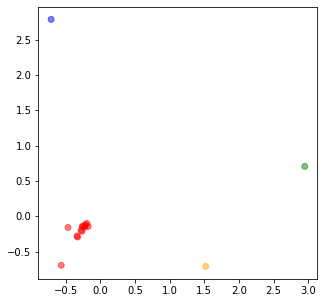

In [36]:
kmeans = KMeans(n_clusters=4, max_iter =300)
kmeans.fit(df)

labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

fig = plt.figure(figsize=(5, 5))
colmap = {1: 'r', 2: 'g', 3: 'b', 4: 'orange'}
colors = list(map(lambda x: colmap[x+1], labels))
plt.scatter(df['x1'], df['x2'], color=colors, alpha=0.5, edgecolor=colors)

In [37]:
df['labels'] = colors
df

,x1,x2,labels
0,-0.256293,-0.151591,r
1,-0.255003,-0.140549,r
2,-0.210825,-0.118589,r
3,-0.192773,-0.101657,r
4,-0.464997,-0.159017,r
5,-0.708389,2.786660,b
6,-0.263101,-0.212532,r
7,-0.222054,-0.151226,r
8,-0.562385,-0.693177,r
9,-0.276706,-0.198796,r


## Zeiss - Bias Boxes

### Right Side - Healthy

In [38]:
path13 = '../../Zeiss/Healthy/Healthy(3)/'
path5 = '../../Zeiss/Healthy/Healthy(5)/'
path6 = '../../Zeiss/Healthy/Healthy(6)/'
paths = [path13,path5, path6]

left = ['8919', '9059', '8960', '9187', '9238', '8914', '8974', '8981', '9025', '9071', '9172', '8904', '8955']
right = ['9189', '8994', '8924', '9175', '8909', '9061', '9084', '9189', 'RNFL']

def load_files_left(path):
    for i in path:
        path_i = os.listdir(i)
        for filename in path_i:
            if filename!='.ipynb_checkpoints': 
                if filename[-8:-4]  in left: 
                    new_path = i + filename 
                    yield pd.read_csv(new_path)
                    
def load_files_right(path): 
    for i in path:
        path_i = os.listdir(i)
        for filename in path_i:
            if filename!='.ipynb_checkpoints': 
                if filename[-8:-4]  in right: 
                    new_path = i + filename 
                    yield pd.read_csv(new_path)

corpus_healthy = pd.concat(load_files_right(paths))


In [39]:
def bias_boxes_zeiss_right(x,y):
    arr = []
    for i,j in zip(x,y):
        if 0<i and 0.61 > i and 0<j and .275 > j: 
            arr.append('A')
        elif 0.61<i and 1 > i and 0<j and .25 > j: 
            arr.append('B')
        elif 0.61<i and 1 > i and .25<j and .5 > j: 
            arr.append('C')
        elif 0.61<i and 1 > i and 0.5<j and 1 > j: 
            arr.append('D')
        elif 0.23<i and 0.61 > i and 0.7<j and 1 > j: 
            arr.append('E')
        elif 0<i and 0.61 > i and 0.5<j and 0.7 > j: 
            arr.append('F')
        else: 
            arr.append('error')
    return arr

def bias_boxes_zeiss_left(x,y): 
    arr = []
    for i,j in zip(x,y):
        if 0<i and 0.4 > i and 0<j and .2 > j: 
            arr.append('A')
        elif 0<i and 0.4 > i and 0.2<j and .5 > j: 
            arr.append('B')
        elif 0.0<i and 0.4 > i and 0.5<j and 1 > j: 
            arr.append('C')
        elif 0.4<i and 0.8 > i and 0<j and 0.25 > j: 
            arr.append('D')
        elif 0.4<i and 1 > i and 0.5<j and 0.71 > j: 
            arr.append('E')
        elif 0.4<i and 0.8 > i and 0.71<j and 1 > j: 
            arr.append('F')
        else: 
            arr.append('error')
    return arr

def make_corpus_3(corpus_new):
    A = np.array(corpus_new.fixation_id[corpus_new.letters=='A'])
    B = np.array(corpus_new.fixation_id[corpus_new.letters=='B'])
    C = np.array(corpus_new.fixation_id[corpus_new.letters=='C'])
    D = np.array(corpus_new.fixation_id[corpus_new.letters=='D'])
    E = np.array(corpus_new.fixation_id[corpus_new.letters=='E'])
    F = np.array(corpus_new.fixation_id[corpus_new.letters=='F'])
    corpus = pd.DataFrame([[1, A], 
                           [2, B],
                           [3, C], 
                           [4, D], 
                           [5, E], 
                           [6, F]], columns=['id', 'sequence'])
    return corpus

x = corpus_healthy.norm_pos_x
y = corpus_healthy.norm_pos_y
arr = bias_boxes_zeiss_right(x,y)

corpus = corpus_healthy
corpus['letters'] = arr
corpus_new = corpus[['letters', 'fixation_id']]
corpus= make_corpus_3(corpus_new)

In [40]:
sgt_ = SGT(kappa=1, 
           lengthsensitive=False, 
           mode='multiprocessing')
sgtembedding_df = sgt_.fit_transform(corpus)
sgtembedding_df = sgtembedding_df.set_index('id')


INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [41]:
pca = PCA(n_components=2)
pca.fit(sgtembedding_df)
X=pca.transform(sgtembedding_df)

df = pd.DataFrame(data=X, columns=['x1', 'x2'])

/home/sanmati/miniconda3/envs/sana-env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


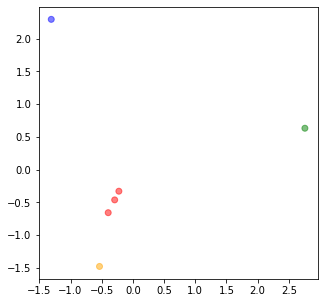

In [42]:
kmeans = KMeans(n_clusters=4, max_iter =300)
kmeans.fit(df)

labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

fig = plt.figure(figsize=(5, 5))
colmap = {1: 'r', 2: 'g', 3: 'b', 4: 'orange'}
colors = list(map(lambda x: colmap[x+1], labels))
plt.scatter(df['x1'], df['x2'], color=colors, alpha=0.5, edgecolor=colors)

In [43]:
df['labels'] = colors
df

,x1,x2,labels
0,-0.395911,-0.657733,r
1,-0.224765,-0.329595,r
2,-0.292103,-0.462266,r
3,-0.535247,-1.479135,orange
4,2.756618,0.632512,g
5,-1.308591,2.296217,b


### Right Side - Glaucoma

In [44]:
path13 = '../../Zeiss/Glaucoma/Glaucoma(3)/'
path5 = '../../Zeiss/Glaucoma/Glaucoma(5)/'
path6 = '../../Zeiss/Glaucoma/Glaucoma(6)/'
paths = [path13,path5, path6]

left = ['8919', '9059', '8960', '9187', '9238', '8914', '8974', '8981', '9025', '9071', '9172', '8904', '8955']
right = ['9189', '8994', '8924', '9175', '8909', '9061', '9084', '9189', 'RNFL']

corpus_diseased = pd.concat(load_files_right(paths))

In [45]:
x = corpus_diseased.norm_pos_x
y = corpus_diseased.norm_pos_y
arr = bias_boxes_zeiss_right(x,y)

corpus = corpus_diseased
corpus['letters'] = arr
corpus_new = corpus[['letters', 'fixation_id']]
corpus= make_corpus_3(corpus_new)

In [46]:
sgt_ = SGT(kappa=1, 
           lengthsensitive=False, 
           mode='multiprocessing')
sgtembedding_df = sgt_.fit_transform(corpus)
sgtembedding_df = sgtembedding_df.set_index('id')


INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [47]:
pca = PCA(n_components=2)
pca.fit(sgtembedding_df)
X=pca.transform(sgtembedding_df)

df = pd.DataFrame(data=X, columns=['x1', 'x2'])

/home/sanmati/miniconda3/envs/sana-env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


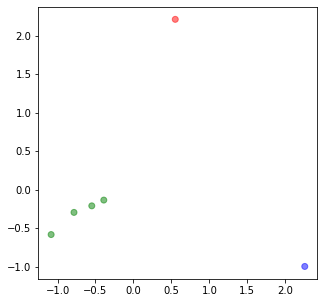

In [48]:
kmeans = KMeans(n_clusters=3, max_iter =300)
kmeans.fit(df)

labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

fig = plt.figure(figsize=(5, 5))
colmap = {1: 'r', 2: 'g', 3: 'b', 4: 'orange'}
colors = list(map(lambda x: colmap[x+1], labels))
plt.scatter(df['x1'], df['x2'], color=colors, alpha=0.5, edgecolor=colors)

In [49]:
df['labels'] = colors
df

,x1,x2,labels
0,-1.084413,-0.581284,g
1,-0.390664,-0.133822,g
2,-0.548953,-0.208441,g
3,2.256560,-0.995286,b
4,0.550845,2.212555,r
5,-0.783374,-0.293722,g


### Left Side - Healthy

In [50]:
path13 = '../../Zeiss/Healthy/Healthy(3)/'
path5 = '../../Zeiss/Healthy/Healthy(5)/'
path5 = '../../Zeiss/Healthy/Healthy(6)/'
paths = [path13,path5, path6]
corpus_healthy = pd.concat(load_files_left(paths))


In [51]:
x = corpus_healthy.norm_pos_x
y = corpus_healthy.norm_pos_y
arr = bias_boxes_zeiss_left(x,y)

corpus = corpus_healthy
corpus['letters'] = arr
corpus_new = corpus[['letters', 'fixation_id']]
corpus= make_corpus_3(corpus_new)

In [52]:
sgt_ = SGT(kappa=1, 
           lengthsensitive=False, 
           mode='multiprocessing')
sgtembedding_df = sgt_.fit_transform(corpus)
sgtembedding_df = sgtembedding_df.set_index('id')


INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [53]:
pca = PCA(n_components=2)
pca.fit(sgtembedding_df)
X=pca.transform(sgtembedding_df)

df = pd.DataFrame(data=X, columns=['x1', 'x2'])

/home/sanmati/miniconda3/envs/sana-env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


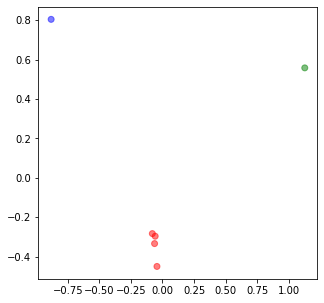

In [54]:
kmeans = KMeans(n_clusters=3, max_iter =300)
kmeans.fit(df)

labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

fig = plt.figure(figsize=(5, 5))
colmap = {1: 'r', 2: 'g', 3: 'b', 4: 'orange'}
colors = list(map(lambda x: colmap[x+1], labels))
plt.scatter(df['x1'], df['x2'], color=colors, alpha=0.5, edgecolor=colors)

In [55]:
df['labels'] = colors
df

,x1,x2,labels
0,-0.057929,-0.295887,r
1,-0.882211,0.803689,b
2,1.127137,0.557637,g
3,-0.080461,-0.282716,r
4,-0.062695,-0.333401,r
5,-0.043841,-0.449322,r


### Left Side - Glaucoma

In [56]:
path13 = '../../Zeiss/Glaucoma/Glaucoma(3)/'
path5 = '../../Zeiss/Glaucoma/Glaucoma(5)/'
path6 = '../../Zeiss/Glaucoma/Glaucoma(6)/'
paths = [path13,path5, path6]
corpus_diseased = pd.concat(load_files_left(paths))

In [57]:
x = corpus_diseased.norm_pos_x
y = corpus_diseased.norm_pos_y
arr = bias_boxes_zeiss_left(x,y)

corpus = corpus_diseased
corpus['letters'] = arr
corpus_new = corpus[['letters', 'fixation_id']]
corpus= make_corpus_3(corpus_new)

In [58]:
sgt_ = SGT(kappa=1, 
           lengthsensitive=False, 
           mode='multiprocessing')
sgtembedding_df = sgt_.fit_transform(corpus)
sgtembedding_df = sgtembedding_df.set_index('id')


INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [59]:
pca = PCA(n_components=2)
pca.fit(sgtembedding_df)
X=pca.transform(sgtembedding_df)

df = pd.DataFrame(data=X, columns=['x1', 'x2'])

/home/sanmati/miniconda3/envs/sana-env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


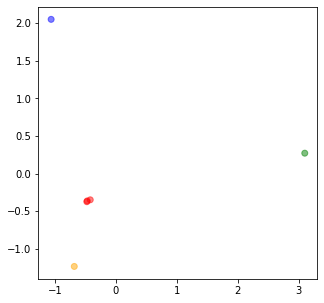

In [60]:
kmeans = KMeans(n_clusters=4, max_iter =300)
kmeans.fit(df)

labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

fig = plt.figure(figsize=(5, 5))
colmap = {1: 'r', 2: 'g', 3: 'b', 4: 'orange'}
colors = list(map(lambda x: colmap[x+1], labels))
plt.scatter(df['x1'], df['x2'], color=colors, alpha=0.5, edgecolor=colors)

In [61]:
df['labels'] = colors
df

,x1,x2,labels
0,-0.474633,-0.374271,r
1,-0.680500,-1.235309,orange
2,3.102227,0.271004,g
3,-0.418500,-0.349037,r
4,-0.468053,-0.363337,r
5,-1.060542,2.050950,b
